<a href="https://colab.research.google.com/github/yhy0519/Machine_learning_of_Python/blob/main/python_m01_02_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**■ KNN**

유방암 데이터의 악성종양을 knn 으로 분류하기  
유방암 데이터:  R을 활용한 머신러닝 -에이콘 출판사

wisc_bc_data.csv


In [ ]:
import pandas as pd     # 데이터 전처리를 위해서 
import seaborn as sns   # 시각화를 위해서

df = pd.read_csv("/content/drive/MyDrive/data/wisc_bc_data.csv")
#설명: R 과는 다르게 stringsAsFactor=TRUE 를 지정하지 않아도 됩니다.

In [ ]:
# DataFrame 확인
print(df.shape)    # (569, 32)  569행 32열

(569, 32)


In [ ]:
print(df.info())     # R 에서 str(df) 명령어와 유사합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [ ]:
print(df.describe())  # R 에서의 summary(df) 의 결과와 유사합니다. 요약통계

                 id  radius_mean  ...  symmetry_worst  dimension_worst
count  5.690000e+02   569.000000  ...      569.000000       569.000000
mean   3.037183e+07    14.127292  ...        0.290076         0.083946
std    1.250206e+08     3.524049  ...        0.061867         0.018061
min    8.670000e+03     6.981000  ...        0.156500         0.055040
25%    8.692180e+05    11.700000  ...        0.250400         0.071460
50%    9.060240e+05    13.370000  ...        0.282200         0.080040
75%    8.813129e+06    15.780000  ...        0.317900         0.092080
max    9.113205e+08    28.110000  ...        0.663800         0.207500

[8 rows x 31 columns]


In [ ]:
# 행을 선택하는 방법 emp[행][열]  --->  emp[조건][컬럼명]
print(df.iloc[0:5, ])    # 0~4번째 행을 가져와라  df.iloc[행번호, 열번호]

         id diagnosis  ...  symmetry_worst  dimension_worst
0  87139402         B  ...          0.2827          0.06771
1   8910251         B  ...          0.2940          0.07587
2    905520         B  ...          0.2998          0.07881
3    868871         B  ...          0.2102          0.06784
4   9012568         B  ...          0.2487          0.06766

[5 rows x 32 columns]


In [ ]:
print(df.iloc[-5: ,])     # 뒤에서 5번째 행부터 끝행까지 가져와라

            id diagnosis  ...  symmetry_worst  dimension_worst
564  911320502         B  ...          0.2235          0.06925
565     898677         B  ...          0.2434          0.08488
566     873885         M  ...          0.3175          0.09772
567     911201         B  ...          0.2606          0.07810
568    9012795         M  ...          0.2730          0.08666

[5 rows x 32 columns]


In [ ]:
# 열을 선택하는 방법 emp[행][열]  --->  emp[조건][c("ename", "sal")]
print(df.iloc[ :, [0,1] ])  # 0번째 열과 1번째 열을 가져와라

            id diagnosis
0     87139402         B
1      8910251         B
2       905520         B
3       868871         B
4      9012568         B
..         ...       ...
564  911320502         B
565     898677         B
566     873885         M
567     911201         B
568    9012795         M

[569 rows x 2 columns]


In [ ]:
print(df.iloc[ :, : ])       # 전체 행, 열 다 가져와라

            id diagnosis  ...  symmetry_worst  dimension_worst
0     87139402         B  ...          0.2827          0.06771
1      8910251         B  ...          0.2940          0.07587
2       905520         B  ...          0.2998          0.07881
3       868871         B  ...          0.2102          0.06784
4      9012568         B  ...          0.2487          0.06766
..         ...       ...  ...             ...              ...
564  911320502         B  ...          0.2235          0.06925
565     898677         B  ...          0.2434          0.08488
566     873885         M  ...          0.3175          0.09772
567     911201         B  ...          0.2606          0.07810
568    9012795         M  ...          0.2730          0.08666

[569 rows x 32 columns]


판다스 데이터 프레임이 어떻게 구성되었는가 ?

    numpy 리스트(일반 리스트)로 컬럼 하나를 구성 --> 시리즈
    numpy 리스트(일반 리스트)로 컬럼 여러개로 구성 --> 데이터 프레임


In [ ]:
# 데이터 전처리 : 정규화 ---> 훈련과 테스트로 데이터를 분리

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 2:].to_numpy()    # 0(id), 1(diagnosis:정답컬럼) 번 열 제외하고 numpy array 로 변환
y = df['diagnosis'].to_numpy()   # 정답컬럼

print(len(X))
print(len(y))

569
569


In [ ]:
# 데이터 정규화를 수행한다.
# 1. 스케일(scale) : 평균은 0이고 표준편차 1인 데이터로 분포시킴
# 2. min/max 정규화 : 0~1 사이의 숫자로 변경
# 아래의 코드는 min/max 정규화는 아니고 scale 입니다

from sklearn import preprocessing 
X=preprocessing.StandardScaler().fit(X).transform(X)   # scale 함수로 정규화

In [ ]:
from sklearn.model_selection import train_test_split 

# 훈련 데이터 70, 테스트 데이터 30으로 나눈다. (X : 데이터, y : 정답라벨)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 10)
# 설명: test_size =0.3 은 데이터를 훈련:테스트=7:3 비율로 나눈다.
# random_state = 10 는 seed 값 설정하는 부분
# 어느 자리에서든 동일한 정확도를 보기 위해서 sedd 값 설정

print(X_train.shape) 
print(y_train.shape) 

(398, 30)
(398,)


In [ ]:
# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
print('-------------------------------------------------------------')
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')

# 설명: 평균은 0에 가깝고 표준편차는 1에 가까운 결과가 출력

평균 = -0.04236386611612179, 표준편차= 0.9823199764297084
평균 = -0.026468988492404984, 표준편차= 0.9992699584982397
평균 = -0.04486992263549647, 표준편차= 0.9797413763706516
평균 = -0.040052991664378236, 표준편차= 0.9845418716843576
-------------------------------------------------------------
평균 = 0.09860127903050526, 표준편차= 1.0332826894145961
평균 = 0.0616061837425541, 표준편차= 0.998985037997365
평균 = 0.10443408894109663, 표준편차= 1.038150107005553
평균 = 0.09322275252878608, 표준편차= 1.0290659076476931


In [ ]:
# 학습/예측(Training/Pradiction)
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=5)   # knn 모델 생성. k=5

# 분류기 학습
classifier.fit(X_train, y_train)   # 훈련 데이터와 훈련 데이터의 라벨로 훈련을 한다.

# 예측
y_pred= classifier.predict(X_test)    # 테스트 데이터를 예측한다.
print(y_pred)

['M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M']


In [ ]:
# 모델 평가 -- 작은 이원교차표 출력
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[97  1]
 [ 5 68]]


In [ ]:
# 민감도, 재현율, 정확도, F1 스코어를 확인한다.
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        98
           M       0.99      0.93      0.96        73

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)   

# k 값이 5 일 때 정확도 0.9649

0.9649122807017544


문제1. 위의 코드에서 적절한 k 값을 알아내는 for 문을 구현하세요.

In [ ]:
import  numpy  as np

errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

[0.04678362573099415, 0.04093567251461988, 0.03508771929824561, 0.04093567251461988, 0.03508771929824561, 0.04678362573099415, 0.029239766081871343, 0.023391812865497075, 0.023391812865497075, 0.023391812865497075, 0.023391812865497075, 0.029239766081871343, 0.029239766081871343, 0.029239766081871343, 0.029239766081871343, 0.03508771929824561, 0.029239766081871343, 0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.04093567251461988, 0.03508771929824561, 0.04678362573099415, 0.03508771929824561, 0.03508771929824561, 0.03508771929824561, 0.04093567251461988]


In [ ]:
for k, i in enumerate(errors):
    print(k+1, '--->', i)

1 ---> 0.04678362573099415
2 ---> 0.04093567251461988
3 ---> 0.03508771929824561
4 ---> 0.04093567251461988
5 ---> 0.03508771929824561
6 ---> 0.04678362573099415
7 ---> 0.029239766081871343
8 ---> 0.023391812865497075
9 ---> 0.023391812865497075
10 ---> 0.023391812865497075
11 ---> 0.023391812865497075
12 ---> 0.029239766081871343
13 ---> 0.029239766081871343
14 ---> 0.029239766081871343
15 ---> 0.029239766081871343
16 ---> 0.03508771929824561
17 ---> 0.029239766081871343
18 ---> 0.03508771929824561
19 ---> 0.03508771929824561
20 ---> 0.03508771929824561
21 ---> 0.03508771929824561
22 ---> 0.03508771929824561
23 ---> 0.03508771929824561
24 ---> 0.04093567251461988
25 ---> 0.03508771929824561
26 ---> 0.04678362573099415
27 ---> 0.03508771929824561
28 ---> 0.03508771929824561
29 ---> 0.03508771929824561
30 ---> 0.04093567251461988


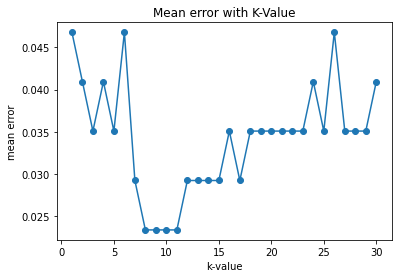

In [ ]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

문제2. 위에서 알아낸 가장 에러가 낮은 k 값은 8,9,10,11 입니다.
	  그러면 k 값을 8을 넣었을때의 정확도를 보시오 ~

In [ ]:
import pandas as pd     # 데이터 전처리를 위해서 
import seaborn as sns   # 시각화를 위해서

df = pd.read_csv("/content/drive/MyDrive/data/wisc_bc_data.csv")

# 데이터 전처리 : 정규화 ---> 훈련과 테스트로 데이터를 분리

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 2:].to_numpy()  # 0(id), 1(diagnosis:정답컬럼) 번 열 제외하고 numpy array 로 변환
y = df['diagnosis'].to_numpy()   # 정답컬럼

# 데이터 정규화를 수행한다.
from sklearn import preprocessing 
X=preprocessing.StandardScaler().fit(X).transform(X)   # 정규화

# 훈련 데이터와 테스트 데이터를 분리하는 작업
from sklearn.model_selection import train_test_split            
                     
# 훈련 데이터 70, 테스트 데이터 30으로 나눈다. (X : 데이터, y : 정답라벨)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 10)

# 학습/예측(Training/Pradiction)
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=8)  # knn 모델 생성. k=8

# 분류기 학습
classifier.fit(X_train, y_train)   # 훈련 데이터와 훈련 데이터의 라벨로 훈련을 한다.

# 예측
y_pred= classifier.predict(X_test)  # 테스트 데이터를 예측한다.

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)   # 0.9649122807017544

0.9766081871345029


설명: 0.976 의 정확도가 나옵니다. 의료 데이터이므로 정확도가 아주 높아야 합니다.  
	그런데 정확도가 100% 가 나오면 좋겠는데 100% 의 정확도가 나오기 어려우므로 FN 을 0으로 만들면  
  정확도가 100% 가 아니더라도 쓰겠다.  
	FN : False Negative(정상) --> 암환자를 정상환자로 잘못 예측했다.
	관심범주는 positive(암)

문제3. 지금 방금했던 시각화는 k 값에 따른 오류율 변동을 2차원 그래프로 시각화 한 것이고
	  이번에는 k 값에 따른 FN 값과 정확도가 어떻게 되는지 확인을 해야합니다.


In [ ]:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

acclist = []
err_list = []
fn_list = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    tn,fp,fn,tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    # 설명: .ravel() 함수를 안쓰면 작은 이원교차표가 나오는데
    # .ravel() 을 쓰면 이원교차표의 값들을 출력할 수 있습니다.
    # .ravel() : 다차원을 1차원으로 푸는 것

    fn_list.append(fn)
    acclist.append(accuracy_score(y_test, y_pred))

    err_list.append(np.mean(y_pred != y_test))

    print(f'k : {i} , acc : {accuracy_score(y_test, y_pred)} , FN : {fn}')

k : 1 , acc : 0.9532163742690059 , FN : 5
k : 2 , acc : 0.9590643274853801 , FN : 7
k : 3 , acc : 0.9649122807017544 , FN : 5
k : 4 , acc : 0.9590643274853801 , FN : 6
k : 5 , acc : 0.9649122807017544 , FN : 5
k : 6 , acc : 0.9532163742690059 , FN : 7
k : 7 , acc : 0.9707602339181286 , FN : 4
k : 8 , acc : 0.9766081871345029 , FN : 4
k : 9 , acc : 0.9766081871345029 , FN : 4
k : 10 , acc : 0.9766081871345029 , FN : 4
k : 11 , acc : 0.9766081871345029 , FN : 4
k : 12 , acc : 0.9707602339181286 , FN : 5
k : 13 , acc : 0.9707602339181286 , FN : 5
k : 14 , acc : 0.9707602339181286 , FN : 5
k : 15 , acc : 0.9707602339181286 , FN : 5
k : 16 , acc : 0.9649122807017544 , FN : 6
k : 17 , acc : 0.9707602339181286 , FN : 5
k : 18 , acc : 0.9649122807017544 , FN : 6
k : 19 , acc : 0.9649122807017544 , FN : 6
k : 20 , acc : 0.9649122807017544 , FN : 6
k : 21 , acc : 0.9649122807017544 , FN : 6
k : 22 , acc : 0.9649122807017544 , FN : 6
k : 23 , acc : 0.9649122807017544 , FN : 6
k : 24 , acc : 0.959

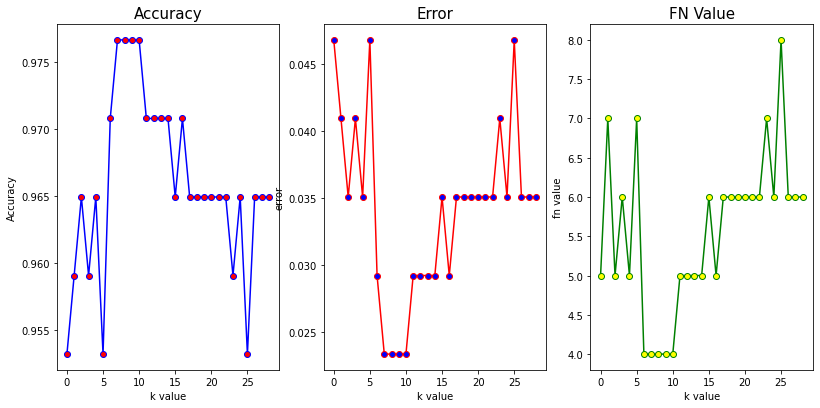

In [ ]:
# 그래프 사이즈 조정하는 부분
plt.figure(figsize=(12,6))
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

# k 값이 변경될 때 마다 정확도가 어떻게 되는지 시각화 하는 부분
plt.subplot(131)
plt.plot(acclist,color='blue', marker='o', markerfacecolor='red')
plt.title('Accuracy', size=15)
plt.xlabel("k value")
plt.ylabel('Accuracy')

# k 값이 변경될 때 마다 에러가 어떻게 되는지 시각화 하는 부분
plt.subplot(132)
plt.plot(err_list, color='red', marker='o', markerfacecolor='blue')
plt.title('Error', size=15)
plt.xlabel("k value")
plt.ylabel('error')

# k 값이 변경될 때 마다 FN 값이 어떻게 되는지 시각화 하는 부분
plt.subplot(133)
plt.plot(fn_list, color='green', marker='o', markerfacecolor='yellow')
plt.title('FN Value', size=15)
plt.xlabel("k value")
plt.ylabel('fn value')

plt.show()

문제4. iris2.csv 데이터를 knn 으로 분류하세요 !

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas  as pd

# 데이터 준비
col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

# csv 파일에서 DataFrame을 생성
dataset = pd.read_csv('/content/drive/MyDrive/data/iris2.csv', encoding='UTF-8', header=None, names=col_names)
print(dataset)

     sepal-length  sepal-width  petal-length  petal-width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
# DataFrame 확인
print(dataset.shape)   # (150, 5)

(150, 5)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(dataset.iloc[:,:-1].describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = dataset.iloc[:, :-1].to_numpy() 
y = dataset['Class'].to_numpy()   

print(len(X)) 
print(len(y)) 

150
150


In [ ]:
from sklearn import preprocessing 
X=preprocessing.StandardScaler().fit(X).transform(X)    # 정규화

In [ ]:
from sklearn.model_selection import train_test_split 
                                                                
# 훈련 데이터 80, 테스트 데이터 20으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

print(X_train.shape)  
print(y_train.shape) 

(120, 4)
(120,)


In [ ]:
# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
print('----------------------------------------------------')
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')

평균 = 0.03231143211830658, 표준편차= 1.0154031412483953
평균 = 0.03316775833559367, 표준편차= 0.9943972353619907
평균 = 0.013079111917528315, 표준편차= 1.010679798690753
평균 = 0.02476074268698191, 표준편차= 1.016355293219859
----------------------------------------------------
평균 = -0.1292457284732285, 표준편차= 0.9246325054100397
평균 = -0.13267103334237781, 표준편차= 1.011283614698444
평균 = -0.05231644767011185, 표준편차= 0.9542977075853483
평균 = -0.09904297074792832, 표준편차= 0.9251085256377652


In [ ]:
# 학습/예측(Training/Pradiction)
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=7)  # knn 모델 생성. k=7

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# 모델 평가 -- 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy) 

0.9333333333333333


문제5. iris 데이터에 대해서 가장 정확도가 좋은 k 값을 지정해서 아이리스 데이터를 분류하는 knn 모델을 생성하시오


In [ ]:
import  numpy  as np

errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.03333333333333333, 0.03333333333333333, 0.0, 0.03333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333]


In [ ]:
for k, i in enumerate(errors):
    print(k+1, '--->', i)

1 ---> 0.03333333333333333
2 ---> 0.03333333333333333
3 ---> 0.03333333333333333
4 ---> 0.03333333333333333
5 ---> 0.03333333333333333
6 ---> 0.03333333333333333
7 ---> 0.06666666666666667
8 ---> 0.06666666666666667
9 ---> 0.06666666666666667
10 ---> 0.06666666666666667
11 ---> 0.06666666666666667
12 ---> 0.03333333333333333
13 ---> 0.03333333333333333
14 ---> 0.0
15 ---> 0.03333333333333333
16 ---> 0.0
17 ---> 0.0
18 ---> 0.0
19 ---> 0.0
20 ---> 0.0
21 ---> 0.0
22 ---> 0.0
23 ---> 0.0
24 ---> 0.0
25 ---> 0.0
26 ---> 0.0
27 ---> 0.0
28 ---> 0.0
29 ---> 0.0
30 ---> 0.03333333333333333


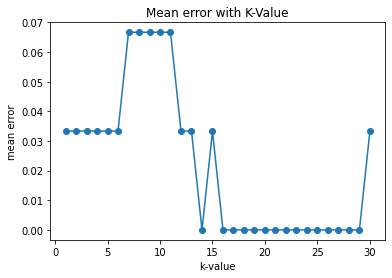

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()

k = 14 에서 에러율 0 으로 정확도 1

In [ ]:
from sklearn import metrics
import pandas  as pd

# 데이터 준비
col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

# csv 파일에서 DataFrame을 생성
dataset = pd.read_csv('/content/drive/MyDrive/data/iris2.csv', encoding='UTF-8', header=None, names=col_names)

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = dataset.iloc[:, :-1].to_numpy() 
y = dataset['Class'].to_numpy()   


from sklearn import preprocessing 
X=preprocessing.StandardScaler().fit(X).transform(X) 

from sklearn.model_selection import train_test_split                                                  
                     
# 훈련 데이터 80, 테스트 데이터 20으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

# 학습/예측(Training/Pradiction)
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=14)  # knn 모델 생성. k=14

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


문제6. 유방암 데이터의 정확도를 더 올리시오 !

    k=12
    기존 정확도 : 0.9707602339181286

정규화 --> scale 함수가 아닌 min/max 함수 적용  
min/max 함수가 머신러닝에서는 더 좋은 결과를 나타냄


In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv("/content/drive/MyDrive/data/wisc_bc_data.csv") 

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 2:].to_numpy() 
y = df['diagnosis'].to_numpy()   

                       
from sklearn import preprocessing 
# X=preprocessing.StandardScaler().fit(X).transform(X)  # scale 함수 적용
X=preprocessing.MinMaxScaler().fit(X).transform(X)      # min/max 함수 적용


from sklearn.model_selection import train_test_split 
                                                               
# 훈련 데이터 70, 테스트 데이터 30으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 10)

# 학습/예측(Training/Pradiction)
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=12)

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)

# 모델 평가
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[98  0]
 [ 2 71]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.98      1.00      0.99        98
           M       1.00      0.97      0.99        73

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)

0.9883040935672515


기존 정확도 : 0.9707602339181286  ---->  0.9883040935672515  
기존 scale 함수를 이용했을때 보다 정확도가 더 올라갔습니다.

#**■ 나이브 베이즈(Naive Bayes)**

R이 좋은 함수와 패키지가 파이썬보다 더 많다. (역사가 더 깊다.)

파이썬으로 머신러닝을 구현하는 경우가 현업에서는 더 많습니다.

앞에서 knn 으로 머신러닝 구현할 때 R 과의 차이점은 ? Factor 로 변환할 필요가 없었다.

구현 코드 :   iris 데이터 분류 


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas  as pd


# 1. 데이터 준비
col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

# csv 파일에서 DataFrame을 생성
dataset = pd.read_csv('/content/drive/MyDrive/data/iris2.csv', encoding='UTF-8', header=None, names=col_names)
print(dataset)

     sepal-length  sepal-width  petal-length  petal-width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
# DataFrame 확인
print(dataset.shape) # (row개수, column개수)

(150, 5)


In [ ]:
print(dataset.info()) # 데이터 타입, row 개수, column 개수, 컬럼 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(dataset.describe()) # 요약 통계 정보

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(dataset.iloc[0:5]) # dataset.head()

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
print(dataset.iloc[-5:]) # dataset.tail()

     sepal-length  sepal-width  petal-length  petal-width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = dataset.iloc[:,:-1].to_numpy()  # DataFrame을 np.ndarray로 변환

# y = 전체 행, 마지막 열 데이터
y = dataset.iloc[:, 4].to_numpy()

In [ ]:
# 2. 데이터 분리 
from sklearn.model_selection import train_test_split
# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)
print(len(X_train), len(X_test))

print(X_train[:3])
print(y_train[:3])

120 30
[[6.6 2.9 4.6 1.3]
 [6.2 2.9 4.3 1.3]
 [7.2 3.  5.8 1.6]]
['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화)
# Z-score 표준화: 평균을 0, 표준편차 1로 변환

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
X_test = scaler.transform(X_test)

# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
print('-----------------------------------------------------------')
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')    

평균 = 1.4802973661668754e-17, 표준편차= 1.0000000000000004
평균 = 2.960594732333751e-17, 표준편차= 0.9999999999999998
평균 = -1.4802973661668754e-17, 표준편차= 0.9999999999999999
평균 = 2.960594732333751e-17, 표준편차= 0.9999999999999998
-----------------------------------------------------------
평균 = -0.1591064219014602, 표준편차= 0.9106063078288726
평균 = -0.16677318256783077, 표준편차= 1.0169815228119636
평균 = -0.06470452825153368, 표준편차= 0.9442136953974514
평균 = -0.1218114514292482, 표준편차= 0.9102215847245505


In [ ]:
# 4. 학습/예측(Training/Pradiction)
from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import GaussianNB
#model = GaussianNB() # Gaussian Naive Bayes 모델 선택 - 연속형 자료
#model = GaussianNB(var_smoothing=1e-09) # Gaussian Naive Bayes 모델 선택 - 연속형 자료, 
#var_smoothing= 라플라스 값 지정 옵션, 1e-09 : 0.000000001

model = BernoulliNB()
model.fit( X_train, y_train )

# 예측
y_pred= model.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


In [ ]:
#5. 모델 평가
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 이원교차표 -- 대각선에 있는 숫자가 정답을 맞춘 것, 그 외가 틀린 것

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       0.91      1.00      0.95        10
Iris-versicolor       0.86      0.46      0.60        13
 Iris-virginica       0.50      0.86      0.63         7

       accuracy                           0.73        30
      macro avg       0.76      0.77      0.73        30
   weighted avg       0.79      0.73      0.72        30



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)  

0.7333333333333333


문제7. 위의 나이브 베이즈 모델의 성능을 더 올리시오 ~

    기존 정확도 : 0.7333 -----> 개선후 정확도 :  ?
         ↓                          ↓
    BernoulliNB                  GaussianNB


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas  as pd

# 1. 데이터 준비
col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

# csv 파일에서 DataFrame을 생성
dataset = pd.read_csv('/content/drive/MyDrive/data/iris2.csv', encoding='UTF-8', header=None, names=col_names)

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = dataset.iloc[:,:-1].to_numpy() # DataFrame을 np.ndarray로 변환

# y = 전체 행, 마지막 열 데이터
y = dataset.iloc[:, 4].to_numpy()

# 데이터 분리 
from sklearn.model_selection import train_test_split

# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화)
# Z-score 표준화: 평균을 0, 표준편차 1로 변환

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
X_test = scaler.transform(X_test)


# 4. 학습/예측(Training/Pradiction)
#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

#model = BernoulliNB()
model = GaussianNB()
model.fit( X_train, y_train )

# 예측
y_pred= model.predict(X_test)

#5. 모델 평가
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 이원교차표 -- 대각선에 있는 숫자가 정답을 맞춘 것, 그 외가 틀린 것

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)  

1.0


    기존 정확도 : 0.7333 -----> 개선후 정확도 :  1.0
         ↓                          ↓
    BernoulliNB                  GaussianNB

문제8. 유방암 데이터의 나이브베이즈 모델을 파이썬으로 생성하고 정확도를 확인하시오


In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv("/content/drive/MyDrive/data/wisc_bc_data.csv") 

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 2:].to_numpy() 
y = df['diagnosis'].to_numpy()   

                       
from sklearn import preprocessing 

#X=preprocessing.StandardScaler().fit(X).transform(X) 
X=preprocessing.MinMaxScaler().fit(X).transform(X) 

from sklearn.model_selection import train_test_split 
                                                                
# 훈련 데이터 70, 테스트 데이터 30으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 10)


# 학습/예측(Training/Pradiction)
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# k-NN 분류기를 생성
#classifier = KNeighborsClassifier(n_neighbors=12)

# 나이브베이즈 분류기를 생성
classifier = GaussianNB() 

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

['M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M']


In [ ]:
# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[95  3]
 [ 7 66]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           B       0.93      0.97      0.95        98
           M       0.96      0.90      0.93        73

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)  

0.9415204678362573


문제9. 위의 나이브 베이즈 모델을 생성할때 위에서는 min/max 정규화를 했는데 이번에는 scale 함수를 적용해서 수행하고 정확도를 확인하시오


In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv("/content/drive/MyDrive/data/wisc_bc_data.csv") 

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 2:].to_numpy() 
y = df['diagnosis'].to_numpy()   

                       
from sklearn import preprocessing 

X=preprocessing.StandardScaler().fit(X).transform(X) 
#X=preprocessing.MinMaxScaler().fit(X).transform(X) 

from sklearn.model_selection import train_test_split 
                                                                
# 훈련 데이터 70, 테스트 데이터 30으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 10)


# 학습/예측(Training/Pradiction)
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# k-NN 분류기를 생성
#classifier = KNeighborsClassifier(n_neighbors=12)

# 나이브베이즈 분류기를 생성
classifier = GaussianNB() 

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)  

0.9415204678362573


설명: 0.9415204678362573 로 min/max 와 차이는 없습니다.

문제10. wine 데이터를 나이브 베이즈 모델로 분류하시오

데이터 선별 : 유방암 데이터, iris 데이터와 같이 종속변수가 분류이면서 수치형 데이터인 데이터로 선별합니다.

In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv('/content/drive/MyDrive/data/wine.csv')
print(df)

    Type  Alcohol  Malic   Ash  ...  Color   Hue  Dilution  Proline
0     t1    14.23   1.71  2.43  ...   5.64  1.04      3.92     1065
1     t1    13.20   1.78  2.14  ...   4.38  1.05      3.40     1050
2     t1    13.16   2.36  2.67  ...   5.68  1.03      3.17     1185
3     t1    14.37   1.95  2.50  ...   7.80  0.86      3.45     1480
4     t1    13.24   2.59  2.87  ...   4.32  1.04      2.93      735
..   ...      ...    ...   ...  ...    ...   ...       ...      ...
173   t3    13.71   5.65  2.45  ...   7.70  0.64      1.74      740
174   t3    13.40   3.91  2.48  ...   7.30  0.70      1.56      750
175   t3    13.27   4.28  2.26  ...  10.20  0.59      1.56      835
176   t3    13.17   2.59  2.37  ...   9.30  0.60      1.62      840
177   t3    14.13   4.10  2.74  ...   9.20  0.61      1.60      560

[178 rows x 14 columns]


In [ ]:
# DataFrame 확인
print(df.shape)  # (178, 14)

(178, 14)


In [ ]:
print(df.info())  # Type 이 라벨 컬럼 입니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    object 
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB
None


In [ ]:
print(df.describe()) # 요약 통계정보를 확인한다. 

          Alcohol       Malic         Ash  ...         Hue    Dilution      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean    13.000618    2.336348    2.366517  ...    0.957449    2.611685   746.893258
std      0.811827    1.117146    0.274344  ...    0.228572    0.709990   314.907474
min     11.030000    0.740000    1.360000  ...    0.480000    1.270000   278.000000
25%     12.362500    1.602500    2.210000  ...    0.782500    1.937500   500.500000
50%     13.050000    1.865000    2.360000  ...    0.965000    2.780000   673.500000
75%     13.677500    3.082500    2.557500  ...    1.120000    3.170000   985.000000
max     14.830000    5.800000    3.230000  ...    1.710000    4.000000  1680.000000

[8 rows x 13 columns]


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 1:].to_numpy() 
y = df['Type'].to_numpy()   

print(df.shape)
print(len(X))
print(len(y))

(178, 14)
178
178


In [ ]:
# 정규화 진행                     
from sklearn import preprocessing 

#X=preprocessing.StandardScaler().fit(X).transform(X) 
X=preprocessing.MinMaxScaler().fit(X).transform(X) 

In [ ]:
from sklearn.model_selection import train_test_split 
                                                                
# 훈련 데이터 90, 테스트 데이터 10으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state = 10)

print(len(X_train))
print(len(X_test))

160
18


In [ ]:
# 학습/예측(Training/Pradiction)
from sklearn.naive_bayes import GaussianNB

# 나이브베이즈 분류기를 생성
classifier = GaussianNB()

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

['t2' 't2' 't1' 't2' 't1' 't2' 't2' 't1' 't3' 't1' 't1' 't2' 't1' 't3'
 't2' 't2' 't3' 't2']


In [ ]:
# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[6 0 0]
 [0 9 2]
 [0 0 1]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          t1       1.00      1.00      1.00         6
          t2       1.00      0.82      0.90        11
          t3       0.33      1.00      0.50         1

    accuracy                           0.89        18
   macro avg       0.78      0.94      0.80        18
weighted avg       0.96      0.89      0.91        18



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)

0.8888888888888888


문제11. 위의 와인 데이터 분류의 나이브 베이즈 모델의 정확도는 0.88 이었습니다.  
	   이번에는 knn 으로 정확도를 확인하세요 ~

In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv('/content/drive/MyDrive/data/wine.csv')

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 1:].to_numpy() 
y = df['Type'].to_numpy()   

# 정규화 진행                     
from sklearn import preprocessing 

#X=preprocessing.StandardScaler().fit(X).transform(X) 
X=preprocessing.MinMaxScaler().fit(X).transform(X) 

from sklearn.model_selection import train_test_split 
                                                                
# 훈련 데이터 90, 테스트 데이터 10으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state = 10)

# 학습/예측(Training/Pradiction)
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB

# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=6)

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

['t2' 't2' 't1' 't2' 't1' 't2' 't2' 't1' 't3' 't1' 't1' 't2' 't1' 't2'
 't2' 't2' 't3' 't2']


In [ ]:
# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[ 6  0  0]
 [ 0 10  1]
 [ 0  0  1]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          t1       1.00      1.00      1.00         6
          t2       1.00      0.91      0.95        11
          t3       0.50      1.00      0.67         1

    accuracy                           0.94        18
   macro avg       0.83      0.97      0.87        18
weighted avg       0.97      0.94      0.95        18



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)  

0.9444444444444444


**■ 파이썬 나이브 베이즈 사이킷런 함수 3가지**

 1. BernoulliNB : 이진형 데이터를 분류할 때 적합
 2. GaussianNB : 연속형 데이터를 분류할 때 적합
 3. MultinomialNB : 범주형 데이터를 분류할 때 적합

문제12. 독버섯을 나이브 베이즈로 분류하시오 !

** 독버섯 데이터를 나이브 베이즈 모델로 분류하기 

     1. R 에서:
     mushroom <- read.csv("mushrooms.csv", header=T, stringsAsFactors=TRUE)

     2. 파이썬에서:
     df = pd.read.csv('c:\\data\\mushrooms.csv')


In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv('/content/drive/MyDrive/data/mushrooms.csv') 
df = pd.get_dummies(df)

In [ ]:
# DataFrame 확인
print(df.shape) # 컬럼이 119개로 늘어남.
# 왜 뻥튀기가됐냐? 독:1 아니면 :0, 독버섯데이터가 명목형데이터라 cap-shape만해도 6개를 만듬.

(8124, 119)


In [ ]:
print(df.info()) #전부 문자형(object)로 되어있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, type_edible to habitat_woods
dtypes: uint8(119)
memory usage: 944.2 KB
None


In [ ]:
print(df.describe()) #요약 통계정보를 확인한다.

       type_edible  type_poisonous  ...  habitat_waste  habitat_woods
count  8124.000000     8124.000000  ...    8124.000000    8124.000000
mean      0.517971        0.482029  ...       0.023634       0.387494
std       0.499708        0.499708  ...       0.151914       0.487208
min       0.000000        0.000000  ...       0.000000       0.000000
25%       0.000000        0.000000  ...       0.000000       0.000000
50%       1.000000        0.000000  ...       0.000000       0.000000
75%       1.000000        1.000000  ...       0.000000       1.000000
max       1.000000        1.000000  ...       1.000000       1.000000

[8 rows x 119 columns]


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 2:].to_numpy() 
y = df.iloc[:,1].to_numpy()   
  
from sklearn.model_selection import train_test_split 
                                                                
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

# 학습/예측(Training/Pradiction)
from sklearn.naive_bayes import MultinomialNB

# 나이브베이즈 분류기를 생성
classifier = MultinomialNB()

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)

0.9497784342688331


In [ ]:
# 학습/예측(Training/Pradiction)
from sklearn.naive_bayes import GaussianNB

# 나이브베이즈 분류기를 생성
classifier = GaussianNB() 

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)

0.9615952732644018


In [ ]:
# 학습/예측(Training/Pradiction)
from sklearn.naive_bayes import BernoulliNB

# 나이브베이즈 분류기를 생성
classifier = BernoulliNB() 

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)

0.9350073855243722


    classifier = MultinomialNB() --> 정확도 : 0.9497784342688331
    classifier = GaussianNB() --> 정확도 : 0.9615952732644018 
    classifier = BernoulliNB() --> 정확도 : 0.9350073855243722 


문제13. 위에서 수행했던 독버섯 분류 나이브 베이즈 모델의 정확도를 아래와 같이 0.99 로 만드는 laplace 값을 알아내시오 !

나이브베이즈 분류기를 생성
    classifier = GaussianNB(var_smoothing= ?  )

    0.9916297390448056

힌트 코드: 

    import  numpy  as np

    errors = []
    for i in np.arange(0.001, 0.01 , 0.001):
        nb = GaussianNB(var_smoothing=i)
        nb.fit(X_train, y_train)
        pred_i = nb.predict(X_test)
        errors.append(np.mean(pred_i != y_test))
    print(errors)

    for k, i  in  zip(np.arange(0.001, 0.01 , 0.001),errors):
        print (k, '--->', i)

In [ ]:
# ■ mushrooms 독버섯데이터로 나이브베이즈

import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv('/content/drive/MyDrive/data/mushrooms.csv') 
df = pd.get_dummies(df)

# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:, 2:].to_numpy() 
y = df.iloc[:,1].to_numpy()   
  
from sklearn.model_selection import train_test_split 
                                                                
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

import  numpy  as np
from sklearn.naive_bayes import GaussianNB

errors = []

for i in np.arange(0.001,0.01,0.001):   # 0.001, 0.002 , ... , 0.010
    nb = GaussianNB(var_smoothing=i)
    nb.fit(X_train, y_train)
    pred_i = nb.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

[0.009354997538158542, 0.008862629246676515, 0.008862629246676515, 0.008370260955194485, 0.008370260955194485, 0.008370260955194485, 0.008370260955194485, 0.008370260955194485, 0.008370260955194485]


In [ ]:
for k, i  in  zip(np.arange(0.001,0.01,0.001), errors):
    print (round(k, 3), '--->', i)

0.001 ---> 0.009354997538158542
0.002 ---> 0.008862629246676515
0.003 ---> 0.008862629246676515
0.004 ---> 0.008370260955194485
0.005 ---> 0.008370260955194485
0.006 ---> 0.008370260955194485
0.007 ---> 0.008370260955194485
0.008 ---> 0.008370260955194485
0.009 ---> 0.008370260955194485


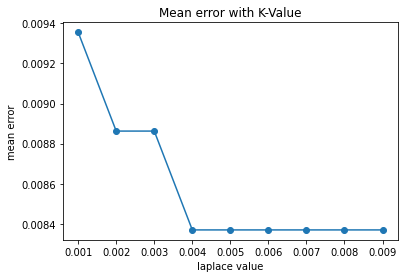

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0.001,0.01,0.001), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('laplace value')
plt.ylabel('mean error')
plt.show()

Laplace 값 0.004 에서 오류율 최소  
정확도 : 1 - 0.00837 = 0.99163

In [ ]:
# 학습/예측(Training/Pradiction)
from sklearn.naive_bayes import GaussianNB

# 나이브베이즈 분류기를 생성
classifier = GaussianNB(var_smoothing=0.004) 

# 분류기 학습
classifier.fit(X_train, y_train)

# 예측
y_pred= classifier.predict(X_test)

# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1055   17]
 [   0  959]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1072
           1       0.98      1.00      0.99       959

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy) 

0.9916297390448056
